In [2]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import  SIMPLE_MOVEMENT

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
done = True

for step in range(1000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

# Preprocess

In [1]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [3]:


# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v2')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')


In [6]:
state = env.reset()

In [7]:


state, reward, done, info = env.step([5])


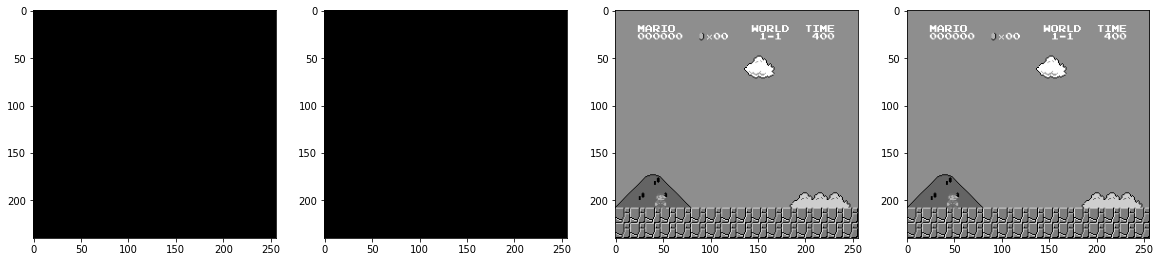

In [8]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx], cmap='gray')
plt.show()

# 3. Train the model

In [4]:
import os
from  stable_baselines3 import PPO
from  stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import BaseCallback

In [5]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [6]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [7]:
callback = TrainAndLoggingCallback(check_freq=10_000, save_path=CHECKPOINT_DIR)

In [8]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [9]:
model.learn(total_timesteps=100_000, callback=callback)

Logging to ./logs/PPO_2
----------------------------
| time/              |     |
|    fps             | 216 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 90            |
|    iterations           | 2             |
|    time_elapsed         | 11            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.2436067e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -6.13e-05     |
|    learning_rate        | 1e-06         |
|    loss                 | 93.5          |
|    n_updates            | 10            |
|    policy_gradient_loss | -8.36e-05     |
|    value_loss           | 354           |
-------------------------

In [10]:
model.save('100_000stepsMarioV2PPO')

# 4. Test it

In [11]:
model = PPO.load('100_000stepsMarioV2PPO')
#model.learn(total_timesteps=10000, callback=callback)

In [31]:
state : env.reset()

In [12]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()


KeyboardInterrupt

